In [16]:
import numpy as np # using import we can gain access to the code in the numpy module
import sympy as sp # using import we can gain access to the code in the sympy module
from scipy.constants import* # we use import* here so that we can access (variables, classes and methods...) without prefixing 
# them with the modules name 
import matplotlib.pyplot as plt # here we can gain access to the code in the matplot.pyplot module
import matplotlib # here we can gain access to the code in the matplotlib module
matplotlib.use('nbagg')# we can use the feature 'nbagg' to enable interactive figures in a live notebook session 
%matplotlib nbagg



# information about bismuth and phosphorus including nuclear spin, electron spin, g-factor for electron, g-factor for nucleus 
# and value for the hyperfine coupling 

# donor   =  [I  , S  , g_e   ,  g_n ,  A(Hz) ]
bismuth    = [9/2,1/2,2.00032,0.9135,1475.17e6]                
phosphorus = [1/2,1/2,2.00032,0.9135,117.53e6 ]

ub = physical_constants["Bohr magneton in Hz/T"][0] # defining the bohr magneton
Axx = bismuth[4]*1*10**-9 # converting the units of the hyperfine interaction into GHz for x component
Ayy = bismuth[4]*1*10**-9 # converting the units of the hyperfine interaction into GHz for y component
Azz = bismuth[4]*1*10**-9 # converting the units of the hyperfine interaction into GHz for z component
Axx1 = phosphorus[4]*1*10**-6 # converting the units of the hyperfine interaction into GHz for x component
Ayy1 = phosphorus[4]*1*10**-6 # converting the units of the hyperfine interaction into GHz for y component
Azz1 = phosphorus[4]*1*10**-6 # converting the units of the hyperfine interaction into GHz for z component
un = physical_constants["nuclear magneton in MHz/T"][0]*1e6 # defining the nuclear magneton and converting to Hertz

print('Bohr magneton is ',ub,'Hz/T')
print('nuclear magneton is ',un,'Hz/T')

Bohr magneton is  13996245042.0 Hz/T
nuclear magneton is  7622593.285 Hz/T


In [17]:
ge = 2.00032 # g-factor for electron
gn = 0.9135 # g-factor for nucleus 
we1 = (ub*ge/1e9)
we3 = (un*gn/1e9)
we12 = (ub*ge/1e6) # calculation of the electron zeeman energy
we32 = (un*gn/1e6) # calculation of the nuclear zeeman energy 
print('electron zeeman energy at 1T',we1,'GHz')
print('nuclear zeeman energy at 1T',we3,'GHz')
print(we1)

electron zeeman energy at 1T 27.996968882413437 GHz
nuclear zeeman energy at 1T 0.006963238965847499 GHz
27.996968882413437


In [18]:
def ang_mo_op(J): # declaration of function that takes a value of the nuclear spin
                 
    N=int(2*J+1) # dimensions of spin matrix found by using the value of nuclear spin
    
    J_plus = np.zeros((N,N)) # Matrix of zeroes produced, which has the dimensions NxN
    J_minus = np.zeros((N,N)) # Second Matrix of zeroes produced, which has the dimensions NxN
    Jz = np.zeros((N,N)) # Third Matrix of zeroes produced, which has the dimensions NxN 
    
    for n in range (N): # sweeping through the different rows of the matrix 
        for m in range(N): # sweeping through the different columns of the matrix
            if n==m+1:
                J_plus[n,m] = (J*(J+1)-(J-n)*(J-n+1))**0.5 # calculating individual elements of matrix
            if n==m-1:
                J_minus[n,m] = (J*(J+1)-(J-m)*(J-m+1))**0.5 # calculating individual elements of matrix
            if n==m:
                Jz[n,m] = J-n # calculating individual elements of matrix
    
    Jx = 0.5*(J_plus+J_minus)
    Jy = -0.5*1j*(J_plus-J_minus)
    return (Jx,Jy,Jz) # this will return the x,y and z components of the nuclear spin

In [19]:
Ix,Iy,Iz = ang_mo_op(9/2) # 9/2 is the nuclear spin of bismuth, and is input to the function ang_mo_op(), this returns the
# x, y and z component of the nuclear spin.

In [20]:
Id2 = np.identity(2)
Id4 = np.identity(4)
Id10 = np.identity(10)
Id20 = np.identity(20)
# remember Ix1, Iy1 and Iz1 matrices
Sx1 = np.matrix([ # electron spin components are all defined with their respective spin matrices. 
    [0,1/2],
    [1/2,0]
])
Sy1 = np.matrix([
    [0,-1j/2],
    [1j/2,0]
])
Sz1 = np.matrix([
    [1/2,0],
    [0,-1/2]
])

In [21]:
import sys
np.set_printoptions(threshold=sys.maxsize) # so that the whole matrix can be seen
def Bihybrid1102(B,D): # taking the range of magnetic field and detuning values
    Bihy5050 = np.zeros((50,50))
    IIz = np.kron(Id4, Iz) # expanding the basis 
    IIx = np.kron(Id4, Ix) # expanding the basis
    IIy = np.kron(Id4, Iy) # expanding the basis
    Sxd0 = np.kron(Sx1, Id20) #expanding the basis for electron on the dot
    Syd0 = np.kron(Sy1, Id20) #expanding the basis for electron on the dot
    Szd0 = np.kron(Sz1, Id20) #expanding the basis for electron on the dot
    Szdp = np.kron(Id2, Sz1)
    Szdo = np.kron(Szdp, Id10) #expanding the basis for electron on the donor
    Sxdp = np.kron(Id2, Sx1)
    Sxdo = np.kron(Sxdp, Id10) #expanding the basis for electron on the donor
    Sydp = np.kron(Id2, Sy1)
    Sydo = np.kron(Sydp, Id10) #expanding the basis for electron on the donor
    Hhyper = Axx*((Szd0*IIz)+(Syd0*IIy)+(Sxd0*IIx)) # Hyperfine energy calculation
    Hzee = B*we1*Szdo + B*we1*Szd0 # Zeeman energy calculation 
    DT1 = np.zeros((40,40)) # filling detuning as before
    DT2 = np.zeros((10,10))
    np.fill_diagonal(DT1,D)
    np.fill_diagonal(DT2,D)
    TC = 5 #Input is straight away in GHz
    TcP = np.zeros((10,10)) # Zeroes matrices for the negative and positive tunnel couplings respective
    TcN = np.zeros((10,10))
    np.fill_diagonal(TcP,TC) # fills positive tunnel coupling values
    np.fill_diagonal(TcN,-TC) # fills negative tunnel coupling values
    ZN = np.zeros((10,10)) # zeros matrix for empty areas of matrix
    HhyHze = Hhyper + Hzee + DT1
    Hzn = B*we3*Iz - DT2
    x = 0 # number of rows down (zero index)
    y = 0 # number of columns across (zero index)
    Bihy5050[x:x+HhyHze.shape[0], y:y+HhyHze.shape[1]] = HhyHze
    a = 40
    b = 40
    Bihy5050[a:a+Hzn.shape[0], b:b+Hzn.shape[1]] = Hzn
    c = 40
    d = 0
    Bihy5050[c:c+ZN.shape[0], d:d+ZN.shape[1]] = ZN
    e = 40
    f = 10
    Bihy5050[e:e+TcP.shape[0], f:f+TcP.shape[1]] = TcP
    g = 40
    h = 20
    Bihy5050[g:g+TcN.shape[0],h:h+TcN.shape[1]] = TcN
    i = 40
    j = 30
    Bihy5050[i:i+ZN.shape[0],j:j+ZN.shape[1]] = ZN
    k = 0
    l = 40
    Bihy5050[k:k+ZN.shape[0],l:l+ZN.shape[1]] = ZN
    m = 10
    n = 40
    Bihy5050[m:m+TcP.shape[0],n:n+TcP.shape[1]] = TcP
    o = 20
    p = 40
    Bihy5050[o:o+TcN.shape[0],p:p+TcN.shape[1]] = TcN
    q = 30
    r = 40
    Bihy5050[q:q+ZN.shape[0],r:r+ZN.shape[1]] = ZN
    return(Bihy5050)

In [146]:
magnetic_sweep_list = np.linspace(0,0.5,1000) # this returns a set of evenly spaced magnetic field values over a specified 
# interval, in this case starting at the value of 0T to a value of 0.5T with 1000 points inbetween.
detuning_sweep_list = np.linspace(-15,15,1000)
rows = 50
len_magnetic_sweep_list = len(magnetic_sweep_list) 
energy = np.zeros((rows, len_magnetic_sweep_list))
# defines a matrix of zeroes that is the length of magnetic_sweep_list,it has dimensions 
# (1000,)

for j in range(len_magnetic_sweep_list):  # sweeps through each value in the magnetic_sweep_list
    Bihybrid1102F = Bihybrid1102(0,detuning_sweep_list[j]) # each value in magnetic_sweep_list is input into the function final_matrix 
    # the resulting matrix has to now be diagonalized to find the corresponding eigenvalues

    eigenvalues , eigenvector =  np.linalg.eigh(Bihybrid1102F)
    for i in range(rows):
        energy[i][j] = eigenvalues[i]

C:\Users\devan\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: ComplexWarning: Casting complex values to real discards the imaginary part


<IPython.core.display.Javascript object>


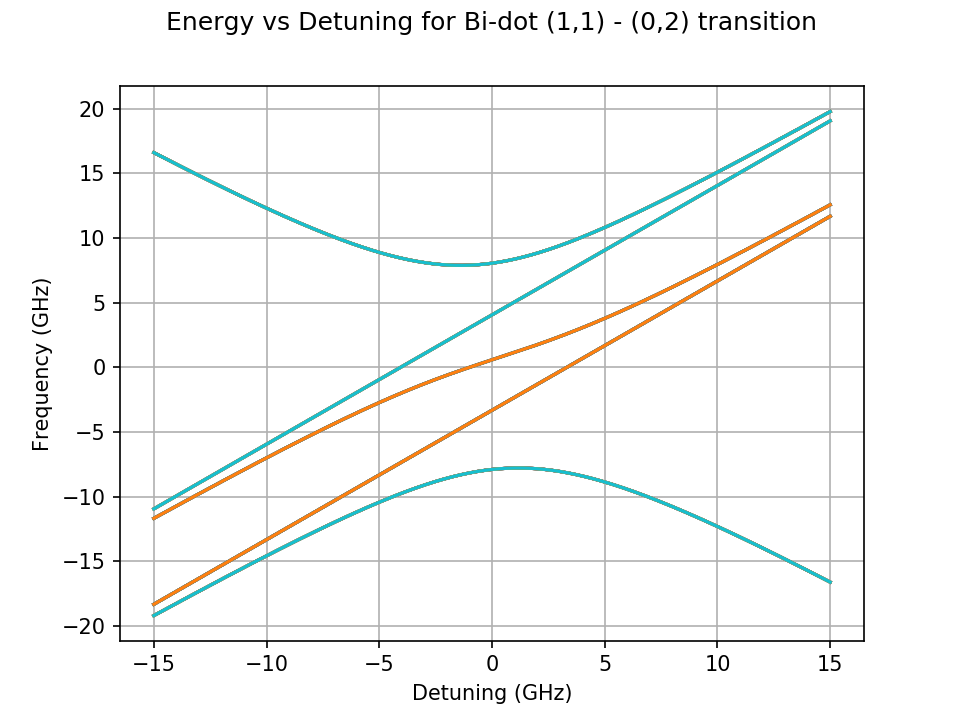

In [147]:
plt.figure()
for i in range(rows):
    plt.plot(detuning_sweep_list,energy[i])
plt.xlabel('Detuning (GHz)')
plt.ylabel('Frequency (GHz)')
plt.title('Energy vs Detuning for Bi-dot (1,1) - (0,2) transition', y=1.08)
plt.grid()

In [148]:
from scipy.interpolate import UnivariateSpline
x_range = np.linspace(detuning_sweep_list[0],detuning_sweep_list[999],1000)
dE2de2 = np.zeros((50, 1000))
for i in range(50):
    tmp = UnivariateSpline(detuning_sweep_list,energy[i],s=0,k=5).derivative(n=2)
    dE2de2[i] = tmp(x_range).reshape((1, 1000))

<IPython.core.display.Javascript object>


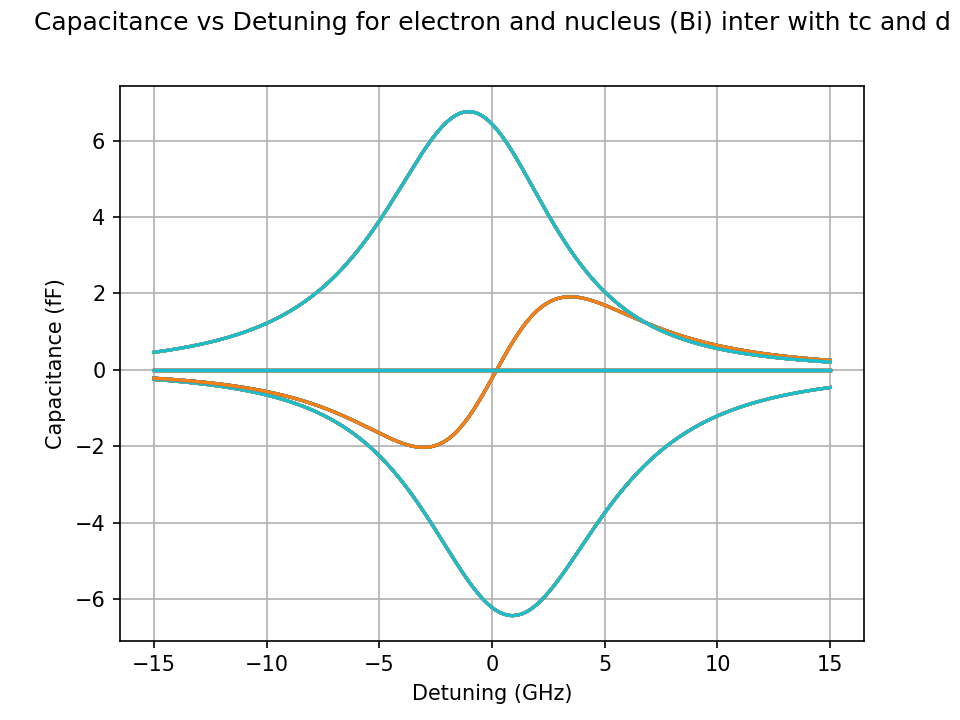

In [149]:
GHz = 1
eV = GHz*4.1*10**-6
k = 1
plt.figure()
for i in range(rows):
    plt.plot(x_range,((1.6*10**-19*k)**2/(eV*1.6*10**-19)*1*10**15*dE2de2[i]))
plt.xlabel('Detuning (GHz)')
plt.ylabel('Capacitance (fF)')
plt.title('Capacitance vs Detuning for electron and nucleus (Bi) inter with tc and d', y=1.08)
plt.grid()

In [26]:
def Default_case ():  
    print("Wrong entry! The number must be valid") 


Spin_Dict = { 
    "9/2": "0",
    "7/2": "1", 
    "5/2": "2",
    "3/2": "3",
    "1/2": "4",
    "-1/2": "5",
    "-3/2": "6",
    "-5/2": "7",
    "-7/2": "8",
    "-9/2": "9",
}

def Execute_Spin_num():
    flag = 0
    plt.figure()
    
    
    for i in range(10):
        spin_num = input("Enter a spin value from -9/2 to 9/2: ") 
    
        onepop = float(input("Enter first population value: "))
        twopop = float(input("Enter second population value: "))
        threepop = float(input("Enter third population value: "))
        fourthpop = float(input("Enter fourth population value: "))
        fifthpop = float(input("Enter fifth population value: "))
        
        offset = Spin_Dict.get(spin_num,Default_case)
        offset = int(offset)
        Cq1 = ((e*k)**2/(eV*1.6*10**-19))*1*10**15*dE2de2[0 + offset]
        Cq2 = ((e*k)**2/(eV*1.6*10**-19))*1*10**15*dE2de2[10 + offset]
        Cq3 = ((e*k)**2/(eV*1.6*10**-19))*1*10**15*dE2de2[20 + offset]
        Cq4 = ((e*k)**2/(eV*1.6*10**-19))*1*10**15*dE2de2[30 + offset]
        Cq5 = ((e*k)**2/(eV*1.6*10**-19))*1*10**15*dE2de2[40 + offset]
        P1 = onepop*Cq1+twopop*Cq2+threepop*Cq3+fourthpop*Cq4+fifthpop*Cq5
        
        if flag == 0:
            print("Zero")
            plt.plot(detuning_sweep_list,energy[0 + offset])
            plt.plot(detuning_sweep_list,energy[10 + offset])
            plt.plot(detuning_sweep_list,energy[20 + offset])
            plt.plot(detuning_sweep_list,energy[30 + offset])
            plt.plot(detuning_sweep_list,energy[40 + offset])
        elif flag == 1:
            print("One")
            plt.plot(detuning_sweep_list,P1)
    
        
        spin_more = input("Do you want to add another spin value?")

        if spin_more == "No":
            break
    
    if flag == 0:  
        plt.xlabel('Detuning (GHz)')
        plt.ylabel('Frequency (GHz)')
        plt.title('Freq vs Magnetic Field for electron and nucleus (Bi) inter with tc and d', y=1.08)
        plt.grid()
    elif flag == 1:
        plt.xlabel('Detuning (GHz)')
        plt.ylabel('Quantum Capacitance (fF)')
        plt.title('Freq vs Magnetic Field for electron and nucleus (Bi) inter with tc and d', y=1.08)
        plt.grid()

<IPython.core.display.Javascript object>


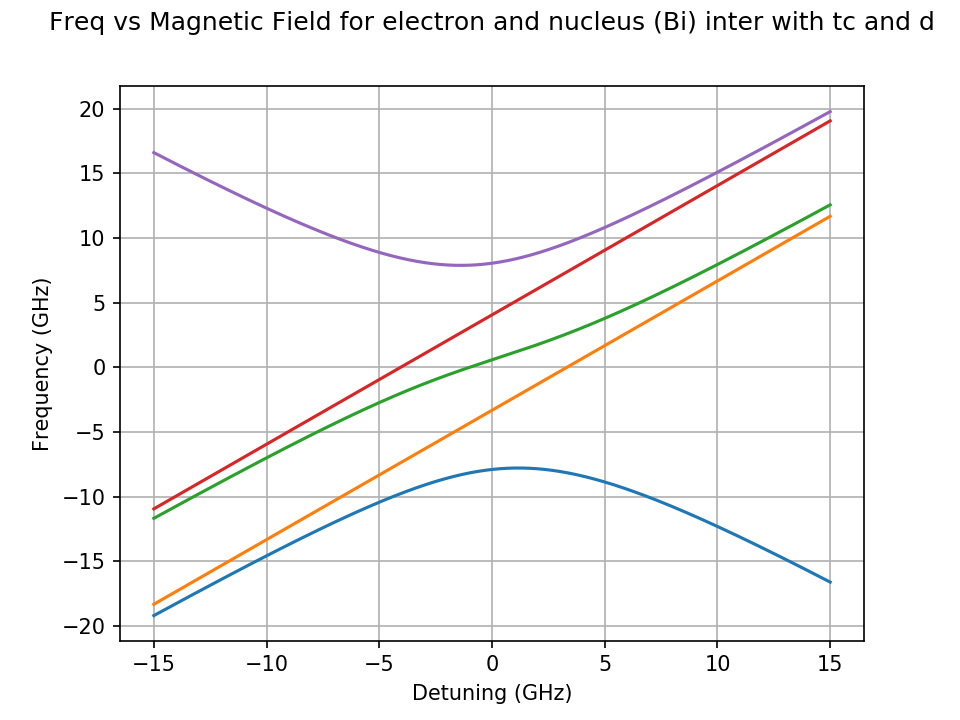

Enter a spin value from -9/2 to 9/2: 3/2
Enter first population value: 0.3
Enter second population value: 0.4
Enter third population value: 0.2
Enter fourth population value: 0.1
Enter fifth population value: 0
Zero
Do you want to add another spin value?No


In [27]:
Execute_Spin_num()

In [183]:
import math

energy_norm = np.zeros((rows, len_magnetic_sweep_list)) # zeros matrix created to hold normalised energy values
Cap = np.zeros((rows, len_magnetic_sweep_list)) # Second zeros matrix to hold thermally averaged quantum capacitance values
pop = np.zeros((rows, len_magnetic_sweep_list))
temp = np.zeros((rows, len_magnetic_sweep_list))
for j in range(len_magnetic_sweep_list): 
    total = 0
    for i in range(rows):
        total = total + 50*math.exp(-energy[i][j]*(1/(20.8*5))) # finds the sum of all thermally averaged energies 
    for i in range(rows):
        energy_norm[i][j] = math.exp(-energy[i][j]*(1/(20.8*0.02)))/total # thermally averages each energy value and divides 
        #by sum total thermally averaged energies 
    for i in range(rows): # Multiplying the normalised energies by the quantum capacitance for each state returns thermally averaged capacitance values
        Cap[i][j] = ((1.6*10**-19*k)**2/(eV*1.6*10**-19))*1*10**15*dE2de2[i][j]*energy_norm[i][j]*(400/600)
    for i in range(rows):
        temp[i][j] = (0.02*20.8)/energy[i][j]

<IPython.core.display.Javascript object>


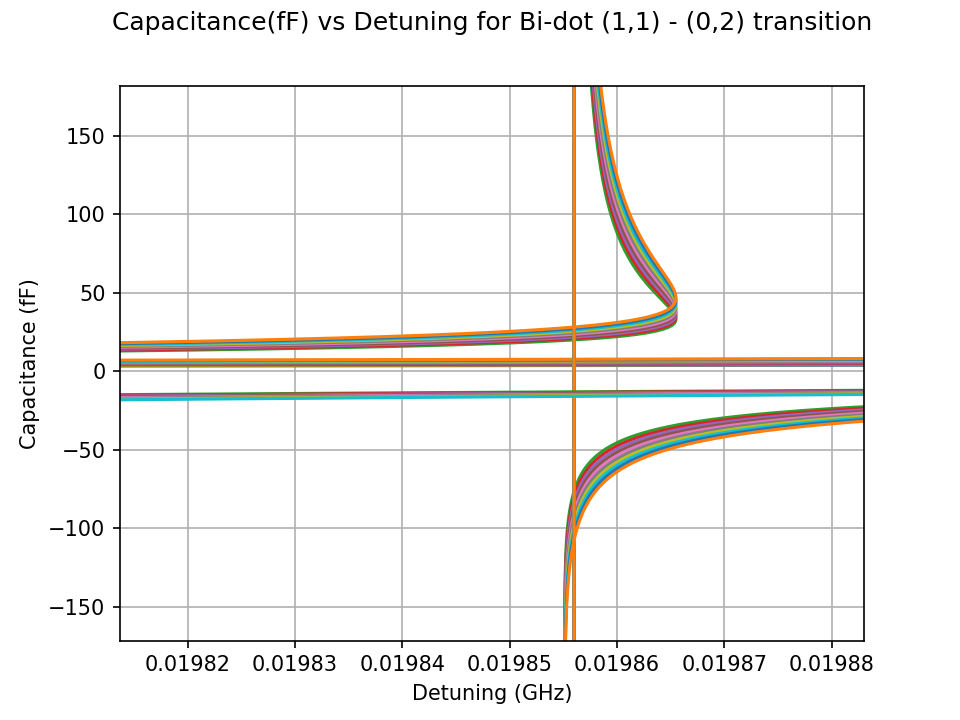

In [185]:
plt.figure()
for i in range(rows):
    plt.plot(energy_norm[i],temp[i])
plt.xlabel('Detuning (GHz)')
plt.ylabel('Capacitance (fF)')
plt.title('Capacitance(fF) vs Detuning for Bi-dot (1,1) - (0,2) transition', y=1.08)
plt.grid()